In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cn_roe_data=pd.read_excel("C:/Users/suzuha/Desktop/CN_ROE_data.xlsx",index_col=0,sheet_name="roe")
us_roe_data=pd.read_excel("C:/Users/suzuha/Desktop/US_ROE_data.xlsx",index_col=0)
cn_stk_price=pd.read_excel("C:/Users/suzuha/Desktop/CN_ROE_data.xlsx",index_col=0,sheet_name="price")
cn_stk_return=pd.read_excel("C:/Users/suzuha/Desktop/CN_ROE_data.xlsx",index_col=0,sheet_name="return")
shci_return=pd.read_excel("C:/Users/suzuha/Desktop/CN_ROE_data.xlsx",index_col=0,sheet_name="shci")
cn_stk_mkt=pd.read_excel("C:/Users/suzuha/Desktop/CN_ROE_data.xlsx",index_col=0,sheet_name="mktsize")
cn_ashare_mkt=pd.read_excel("C:/Users/suzuha/Desktop/CN_ROE_data.xlsx",index_col=0,sheet_name="amktsize")
accrual=pd.read_excel("C:/Users/suzuha/Desktop/accruals.xlsx",index_col=0,sheet_name="accrual")
abaccrual=pd.read_excel("C:/Users/suzuha/Desktop/accruals.xlsx",index_col=0,sheet_name="abaccrual")
normaccrual=pd.read_excel("C:/Users/suzuha/Desktop/accruals.xlsx",index_col=0,sheet_name="normaccrual")

In [3]:
cn_roe_data_flat=pd.Series(cn_roe_data.values.flatten()[~np.isnan(cn_roe_data.values.flatten())])/100
us_roe_data_flat=pd.Series(us_roe_data.values.flatten()[~np.isnan(us_roe_data.values.flatten())])/100
cn_firm_years=cn_roe_data_flat.notna().sum()
us_firm_years=us_roe_data_flat.notna().sum()

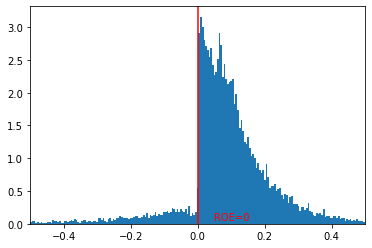

In [4]:
plot_data=cn_roe_data_flat[(cn_roe_data_flat.abs()<0.5)&(cn_roe_data_flat!=0)]
plt.hist(plot_data,bins=int((plot_data.max()-plot_data.min())/0.005),
        weights = np.zeros_like(plot_data)+100/len(plot_data))
plt.xlim(-0.5,0.5)
plt.annotate("ROE=0",(0.05,0.05),c="r")
plt.axvline(x=0,c="r")

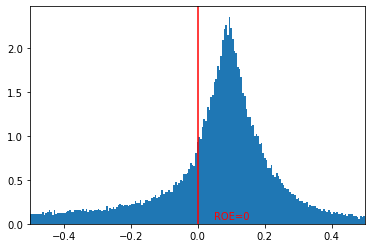

In [5]:
plot_data=us_roe_data_flat[(us_roe_data_flat.abs()<0.5)&(us_roe_data_flat!=0)]
plt.hist(plot_data,bins=int((plot_data.max()-plot_data.min())/0.005),
        weights = np.zeros_like(plot_data)+100/len(plot_data))
plt.xlim(-0.5,0.5)
plt.annotate("ROE=0",(0.05,0.05),c="r")
plt.axvline(x=0,c="r")

In [6]:
flat_data=pd.DataFrame({"accrual":accrual.values.flatten(),
            "abaccrual":abaccrual.values.flatten(),
            "normaccrual":normaccrual.values.flatten(),
            "roe":cn_roe_data.values.flatten()/100,
            "mkt_size":cn_stk_mkt.values.flatten(),
            "amkt_size":cn_ashare_mkt.values.flatten(),
            "stk_return":cn_stk_return.values.flatten(),
            "id_mkt":np.nan,
            "id_accrual":np.nan,
            "id_normaccrual":np.nan,
            "group_mkt":np.nan,
            "group_accrual":np.nan,
            "group_normaccrual":np.nan,
            })
flat_data.loc[flat_data.stk_return==0,"stk_return"]=np.nan
flat_data=flat_data.dropna(subset="stk_return").reset_index(drop=True)

In [11]:
flat_data.loc[flat_data.sort_values(by="accrual").reset_index()["index"],"id_accrual"]=\
    flat_data.sort_values(by="accrual").reset_index().index
flat_data.loc[flat_data.sort_values(by="normaccrual").reset_index()["index"],"id_normaccrual"]=\
    flat_data.sort_values(by="normaccrual").reset_index().index
flat_data.loc[flat_data.sort_values(by="mkt_size").reset_index()["index"],"id_mkt"]=\
    flat_data.sort_values(by="mkt_size").reset_index().index

In [12]:
step=len(flat_data)/10
flat_data.group_accrual=(flat_data.id_accrual/step).astype("int")+1
flat_data.group_normaccrual=(flat_data.id_normaccrual/step).astype("int")+1
flat_data.group_mkt=(flat_data.id_mkt/step).astype("int")+1

In [13]:
flat_data["SAR"]=flat_data.stk_return-flat_data.groupby("group_mkt").stk_return.mean().loc[flat_data["group_mkt"]].reset_index(drop=True)

In [14]:
table3=pd.DataFrame({"Portfolio accrual ranking":["Lowest",2,3,4,5,6,7,8,9,"Highest","Hedge"],
                    "N":flat_data.groupby("group_accrual").stk_return.count().reset_index(drop=True),
                    "Size-adjusted returns":flat_data.groupby("group_accrual").SAR.mean().reset_index(drop=True),
                    },index=list(range(11)))

In [15]:
#建立加权平均函数
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return ((d*w).sum()/w.sum())
    except ZeroDivisionError:
        return d.mean()

In [16]:
table3["MAR1"]=flat_data.groupby("group_accrual").stk_return.mean().reset_index(drop=True)
table3["MAR2"]=flat_data.groupby("group_accrual").agg(wavg,"SAR","mkt_size").stk_return.reset_index(drop=True)
table3["MAR3"]=flat_data.groupby("group_accrual").agg(wavg,"SAR","amkt_size").stk_return.reset_index(drop=True)
table3.iloc[10,2:]=table3.iloc[9,2:]-table3.iloc[0,2:]

In [17]:
table8=pd.DataFrame({"Portfolio accrual ranking":["Lowest",2,3,4,5,6,7,8,9,"Highest","Hedge"],
                    "N":flat_data.groupby("group_normaccrual").stk_return.count().reset_index(drop=True),
                    "Size-adjusted returns":flat_data.groupby("group_normaccrual").SAR.mean().reset_index(drop=True),
                    },index=list(range(11)))

In [18]:
table8["MAR1"]=flat_data.groupby("group_normaccrual").stk_return.mean().reset_index(drop=True)
table8["MAR2"]=flat_data.groupby("group_normaccrual").agg(wavg,"SAR","mkt_size").stk_return.reset_index(drop=True)
table8["MAR3"]=flat_data.groupby("group_normaccrual").agg(wavg,"SAR","amkt_size").stk_return.reset_index(drop=True)
table8.iloc[10,2:]=table3.iloc[9,2:]-table3.iloc[0,2:]